### Theoretical Background

### Logistic Regression Implementation

In [56]:
import numpy as np

class logistic_regression:

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.classes_ = None

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, X, y):

        num_rows, num_columns = X.shape

        # parameters between 0 and 1
        self.weights = np.random.rand(num_columns)
        self.bias = np.random.rand()

        # iterating
        for _ in range(self.iterations):
            # linear model output
            linear_model = np.dot(X, self.weights) + self.bias

            # input into the sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # gradients for parameters
            dw = (1/num_rows) * np.dot(X.T, (y_predicted - y))
            db = (1/num_rows) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.learning_rate*dw
            self.bias -= self.bias*db

    def predict(self, X):
        # linear model output
        linear_model = np.dot(X, self.weights) + self.bias

        # input into the sigmoid function
        y_predicted = self.sigmoid(linear_model)

        # predictions based on the probabilities
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_predicted_class)

### Model Testing

Now, we’ll test our custom-built algorithm and compare its performance to scikit-learn's Logistic Regression model.

Since our goal is solely to evaluate the metrics of both models, there's no need to use a complex dataset or go through the entire process of exploratory data analysis and feature engineering. Instead, we’ll utilize the Breast Cancer toy dataset provided by scikit-learn, which is well-suited for this purpose.

Starting with the function that we just built, we can see that it reaches an accuracy of 89%:

Test accuracy: 0.89
Precision:  0.91
Recall:  0.91
F1 Score:  0.91


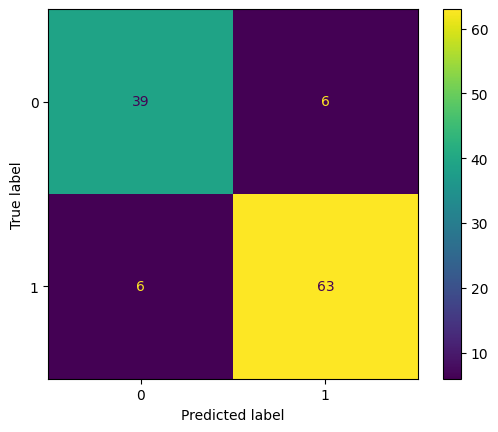

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# toy dataset from sklearn
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
regressor = logistic_regression(learning_rate=0.0001, iterations=10000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# metrics
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f_score = f1_score(y_test, predictions)

print("Test accuracy: {0:.2f}".format(accuracy))
print("Precision: ", precision.round(2))
print("Recall: ", recall.round(2))
print("F1 Score: ", f_score.round(2))

confusion_matrix(y_test, predictions, labels=regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=regressor.classes_)
disp.plot()
plt.show()

The pre-built LogisticRegression function from the scikit-learn package gets an accuracy of 95%:

Test accuracy: 0.95
Precision:  0.92
Recall:  1.0
F1 Score:  0.96


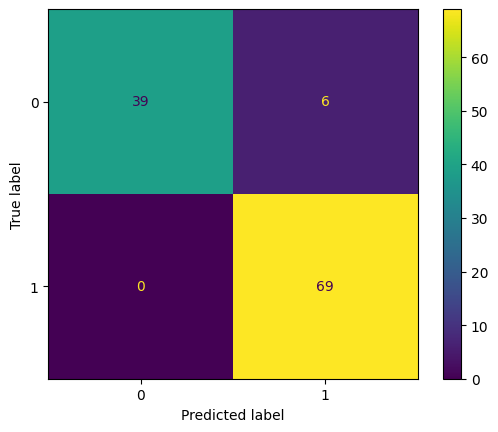

In [60]:
from sklearn.linear_model import LogisticRegression 

scikit_model = LogisticRegression(max_iter=10000)
scikit_model.fit(X_train, y_train)
scikit_predictions = scikit_model.predict(X_test)

# metrics
cm = confusion_matrix(y_test, scikit_predictions, labels=scikit_model.classes_)
accuracy = accuracy_score(y_test, scikit_predictions)
precision = precision_score(y_test, scikit_predictions)
recall = recall_score(y_test, scikit_predictions)
f_score = f1_score(y_test, scikit_predictions)

print("Test accuracy: {0:.2f}".format(accuracy))
print("Precision: ", precision.round(2))
print("Recall: ", recall.round(2))
print("F1 Score: ", f_score.round(2))


confusion_matrix(y_test, scikit_predictions, labels=scikit_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=scikit_model.classes_)
disp.plot()
plt.show()